# Local Linear Regression
Spring 2019 AME-70790 Final Project

Nicholas Geneva (ngeneva@nd.edu)

Reference: Wand, M. P., & Jones, M. C. (1994). Kernel smoothing. Chapman and Hall/CRC.
___
We now focus on *kernel regression* which is a nonparametric regression method which shares many of the same ideas as kernel density estimation.
One of the main advantages of kernel regression methods is their underlying simplicity compared to other non-parametric methods such as spline functions or wavelets.
We will specifically focus on a subset of kernel regression methods called *local polynomial estimators*.

#### Local Polynomial Estimators
Let us consider an arbitrary set of $n$ training points $\left\{x_{i},y_{i}\right\}_{i=1}^{n}$.
To formulate the local polynomial estimator we start by first looking at a standard least squares regression model with a polynomial basis function:
    $$\begin{gather}
    \mathcal{L} = \sum_{i=1}^{n}\left(y_{i}-\textbf{w}^{T}\textbf{X}\right)^{2},\\
    \textbf{w} = \left[ w_{1}, w_{2}, ... , w_{p}\right]^{T}, \quad \textbf{X}=\left[\begin{matrix} 1 & x_{1} & x_{1}^{2} &... & x_{1}^{p} \\ 1 & x_{2} & x_{2}^{2} &... & x_{2}^{p} \\ ... & & & & ... \\ 1 & x_{n} & x_{n}^{2} &... & x_{n}^{p} \\\end{matrix}\right].
    \end{gather}$$
In the standard least square approach we would take the derivative of the loss with respect to the weights and set it equal to zero.
However, we will take a slightly different approach, consider the parameterization $m_{w}(x)=\textbf{w}^{T}\textbf{X}$ where the function $m_{w}$ now represents the polynomial that we with to fit.
Now rather than considering the polynomial directly, we approximate it using Taylor expansion to the $p$-th order:
    $$\begin{gather}
    \mathcal{L} = \sum_{i=1}^{n}\left(y_{i}-m_{w}(x_{i})\right)^{2},\\
    m_{w}(x_{i})\approx m(x)+m'(x)(x_{i}-x)+\frac{m''(x)}{2}(x_{i}-x)^{2}+...+\frac{m^{(p)}(x)}{p!}(x_{i}-x)^{p},\\
    \mathcal{L} = \sum_{i=1}^{n}\left(y_{i}-\sum_{j=0}^{p}\frac{m^{(j)}(x)}{j!}(x_{i}-x)^{j}\right)^{2}= \sum_{i=1}^{n}\left(y_{i}-\sum_{j=0}^{p}\beta_{j}(x_{i}-x)^{j}\right)^{2},
    \end{gather}$$
where we have replaced the coefficients of the Taylor expansion with $\beta_{j}$.
The last addition is the addition of a kernel operator such the contributions of each datum $(x_{i},y_{i})$ are based on its spacial location to the point of interest:
    $$\mathcal{L} = \sum_{i=1}^{n}\left(y_{i}-\sum_{j=0}^{p}\beta_{j}(x_{i}-x)^{j}\right)^{2}K_{h}(x_{i}-x).$$
We can reformulate the loss in matrix form and solve similar to standard least squares regression:
    $$\begin{align}
        \mathcal{L}&=(\textbf{Y}-\boldsymbol{\beta}^{T}\textbf{X}_{x})^{2}\textbf{W}_{x}\\
        \frac{\partial \mathcal{L}}{\partial\boldsymbol{\beta}}&=2\textbf{X}_{x}^{T}\textbf{W}_{x}\textbf{X}_{x}\boldsymbol{\beta} - 2\textbf{X}_{x}^{T}\textbf{W}_{x}\textbf{Y}\\
        \hat{\boldsymbol{\beta}}(x) &= \left(\textbf{X}_{x}^{T}\textbf{W}_{x}\textbf{X}_{x}\right)^{-1}\textbf{X}_{x}^{T}\textbf{W}_{x}\textbf{Y},
    \end{align}$$
assuming $\textbf{X}^{T}\textbf{W}\textbf{X}$ is invertible. Each matrix is defined as follows:
    $$\textbf{Y}=\left[y_{1},y_{2},...,y_{n}\right]^{T}, \quad 
    \textbf{X}_{x}=\left[\begin{matrix} 1 & x_{1}-x &... & x_{1}^{p}-x \\ 1 & x_{2}-x & ... & x_{2}^{p}-x \\ ... & & & ... \\ 1 & x_{n}-x &... & x_{n}^{p}-x \\\end{matrix}\right], \quad 
    \textbf{W}_{x}=\textrm{diag}\left\{K_{h}(x_{1}-x), ..., K_{h}(x_{p}-x)\right\}.$$
Since we have defined the Taylor expansion centered around point $x$, the prediction at point $x$ is then simply the intercept coefficient:
    $$\hat{\beta}_{0} = \hat{m}(x) = \textbf{e}^{T}\left(\textbf{X}_{x}^{T}\textbf{W}_{x}\textbf{X}_{x}\right)^{-1}\textbf{X}_{x}^{T}\textbf{W}_{x}\textbf{Y},$$
where $\textbf{e}^{T}$ is a $[p+1]$ vector with the first element equal to 1 and the rest zero.
Note that unlike linear regression, this expression must be evaluated at every predictive point.
This makes the computational cost of local polynomial estimators much more expensive.

#### Local Linear Regression
With the general formulation of the local polynomial estimator defined with its solution, let us start by taking a look at the simplest form *local linear regression* which can be found from the equations above by setting $p=1$:
    $$\mathcal{L} = \sum_{i=1}^{n}\left(y_{i}-\beta_{0} + \beta_{1}(x_{i}-x)\right)^{2}K_{h}(x_{i}-x).$$
For the kernel function, we will continue the normal distribution $K_{h}=\mathcal{N}(0,h^{2})$. Now for our regression problem we will consider the following function:
    $$m(x)=2\exp\left\{-x^{2}/(0.3)^{2}\right\}+3\exp\left\{-(x-1)^{2}/(0.7)^{2}\right\}, \quad x\in[0,1].$$
When generating our training data, we evenly sample points between [0,1] and add additional output-wise noise to each observation:
    $$y_{i}=m(x_{i})+0.075\epsilon_{i},\quad \epsilon_{i}\sim\mathcal{N}(0,1).$$

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
plt.close("all")
np.random.seed(123)
ntrain = 100 # Number of training points
h = 0.05 # Kernel Bandwidth

# Generate training data
x_train = np.linspace(0,1,ntrain)
Y = 2*np.exp(-x_train**2/(0.3**2)) + 3*np.exp(-(x_train-1)**2/(0.7**2)) + 0.075*np.random.randn(ntrain)

# Predict
n_pred = 50
x_pred = np.linspace(0,1,n_pred)
betas = np.zeros((n_pred, 2))
for i, x0 in enumerate(x_pred):
    # Solve for betas
    X = np.stack([np.ones(ntrain), x_train-x0], axis=1)
    W = np.diag(norm.pdf(x_train-x0, loc=0, scale=h))
    betas[i] = np.linalg.inv(X.T.dot(W).dot(X)).dot(X.T).dot(W).dot(Y)

With the beta coefficients calculated we have the predictions of the model.
As one can imagine, when the number of points one needs to predict at increases significantly this local linear regression model will be unusable.

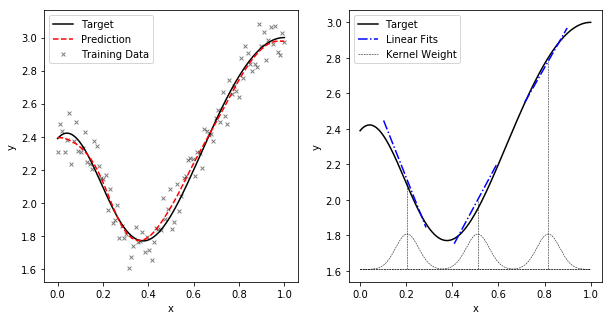

In [3]:
fig = plt.figure(figsize=(10,5))
ax = []
ax.append(plt.subplot2grid((1, 2), (0, 0)))
ax.append(plt.subplot2grid((1, 2), (0, 1)))


# Plot target
x_target = np.linspace(0,1,200)
y_target = 2*np.exp(-x_target**2/(0.3**2)) + 3*np.exp(-(x_target-1)**2/(0.7**2))
ax[0].plot(x_target, y_target, '-', color='k', label='Target')

# Plot training data
ax[0].scatter(x_train, Y, c='k', s=15.0, marker='x', linewidth=1.0, label='Training Data', alpha=0.5)

# Plot local linear kernel estimate
# Recall that the prediction at each point is simply the intercept value beta0
ax[0].plot(x_pred, betas[:,0], '--', color='r', label='Prediction')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].legend()

# Plot several local linear fits
p1, = ax[1].plot(x_target, y_target, '-', color='k', label='Target')
idxs = [int(n_pred/5), int(n_pred/2), int(4*n_pred/5)]
for i, idx in enumerate(idxs):
    x_cen = x_pred[idx]
    x_loc = x_pred[idx-int(n_pred/10):idx+int(n_pred/10)]
    p2, = ax[1].plot(x_loc, betas[idx,0]+betas[idx,1]*(x_loc - x_cen), '-.', color='b')
    p3, = ax[1].plot(x_target, 0.025*norm.pdf(x_target-x_cen, loc=0, scale=h)+np.min(Y), '--', color='k', linewidth=0.5)
    ax[1].plot([x_cen,x_cen], [np.min(Y), betas[idx,0]], '--', color='k', linewidth=0.5) # center line

ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].legend((p1,p2,p3),('Target', 'Linear Fits', 'Kernel Weight'))

# Save and show figure
plt.savefig('figs/05_local_linear_regression.pdf')
plt.savefig('figs/05_local_linear_regression.png')
plt.show()

On the left we can see the prediction of the local linear regression which does a very nice job at estimating the function. On the right three local linear fits which illustrates how the local linear regression predicts by fitting a linear model centered at each prediction point. 
Below are the kernel weights which illustrate the range of training points that have influence on the prediction. 

#### Bandwidth Sensitivity
Similar to kernel density estimation, the bandwidth of the kernel can be very influential over the prediction quality.

In [4]:
band_widths = [0.005, 0.05, 0.2]
# Predict
n_pred = 50
x_pred = np.linspace(0,1,n_pred)
betas = np.zeros((len(band_widths), n_pred, 2))
for i, h in enumerate(band_widths):
    for j, x0 in enumerate(x_pred):
        # Solve for betas
        X = np.stack([np.ones(ntrain), x_train-x0], axis=1)
        W = np.diag(norm.pdf(x_train-x0, loc=0, scale=h))
        betas[i,j] = np.linalg.inv(X.T.dot(W).dot(X)).dot(X.T).dot(W).dot(Y)

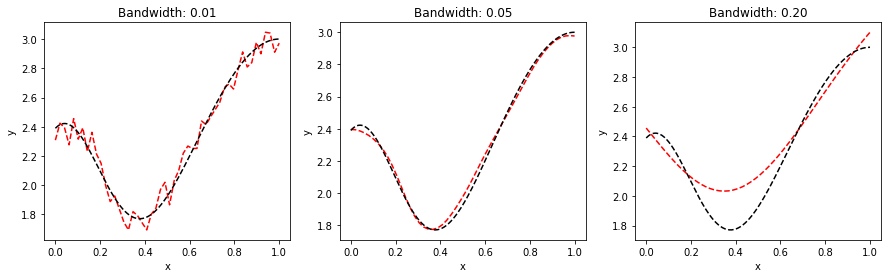

In [5]:
fig = plt.figure(figsize=(15,4))
ax = []
ax.append(plt.subplot2grid((1, 3), (0, 0)))
ax.append(plt.subplot2grid((1, 3), (0, 1)))
ax.append(plt.subplot2grid((1, 3), (0, 2)))

for i, h in enumerate(band_widths):
    # Kernel prediction
    ax[i].plot(x_pred, betas[i,:,0], '--', c='r', label='KDE')
    # Target 
    ax[i].plot(x_target, y_target, '--', color='k', label='Target')
    ax[i].set_title('Bandwidth: {:.02f}'.format(h))
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')
    
# Save and show figure
plt.savefig('figs/05_local_linear_bandwidth.pdf')
plt.savefig('figs/05_local_linear_bandwidth.png')
plt.show()

Here we see precisely the trends seen for kernel density estimation. 
If the bandwidth is too low the prediction is noisy and if it is too high the prediction is over smoothed.